In [6]:
from glob import glob
from pathlib import Path
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [7]:
a = ['Bach,_Johann_Sebastian', 'Beethoven,_Ludwig_van', 'Chopin,_Fr%C3%A9d%C3%A9ric', 'Haydn,_Joseph', 'Liszt,_Franz', 'Mozart,_Wolfgang_Amadeus', 'Schubert,_Franz', 'Schumann,_Robert', 'Scriabin,_Aleksandr']
b = ["Bach", "Beethoven", "Chopin", "Haydn", "Liszt", "Mozart", "Schubert", "Schumann", "Scriabin"]

name2last = dict(zip(a, b))

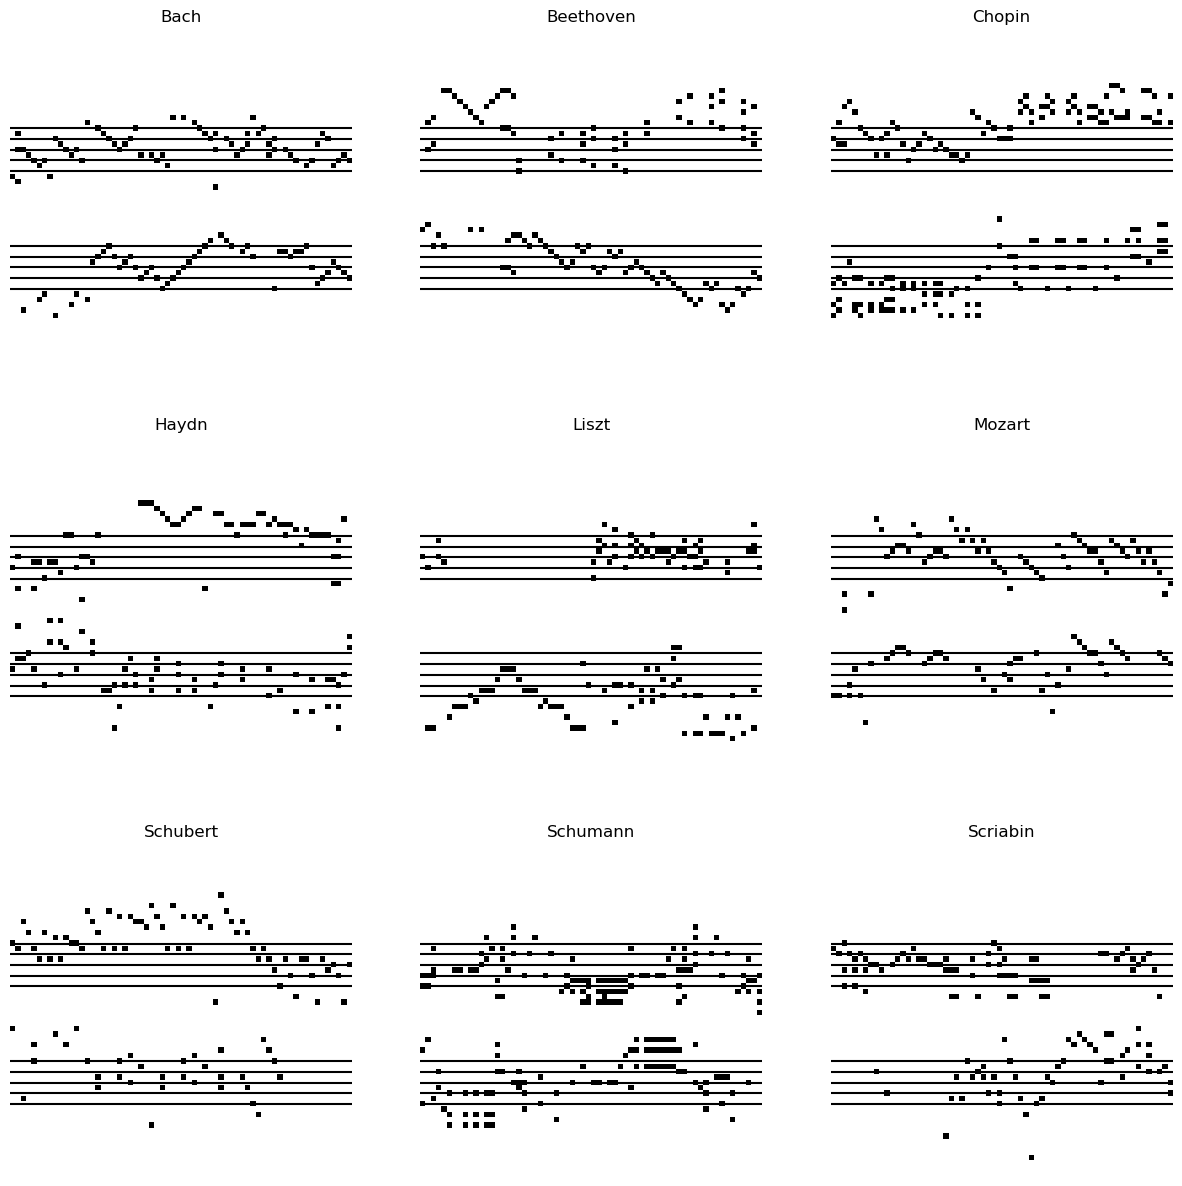

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
def visualize_bootleg_score(ax, bs, lines = [13, 15, 17, 19, 21, 25, 27, 29, 31, 33]):
    if bs.shape[0] == 62:
        lines = [13, 15, 17, 19, 21, 35, 37, 39, 41, 43]
    # plt.figure(figsize = (10,10))
    ax.imshow(1 -bs, cmap = 'gray', origin = 'lower')
    # for l in range(1, bs.shape[0], 2):
    #     plt.axhline(l, c = 'grey')
    for l in lines:
        ax.axhline(l, c = 'black')

d_path = "../9_way_dataset.pkl"
def data_preparation(labeled_data):
    """Prepare data for training, validation, and testing.
    
    Returns
    -------
    train_df : pd.DataFrame
        Training data with 2 columns, "text" and "label".
    val_df : pd.DataFrame
        Validation data with 2 columns, "text" and "label".
    test_df : pd.DataFrame
        Testing data with 2 columns, "text" and "label".
    """

    d = pd.read_pickle(labeled_data)
    train_X, train_y, val_X, val_y, test_X, test_y = d[0], d[1], d[2], d[3], d[4], d[5]

    train_df = pd.DataFrame({"bscore": train_X, "label": train_y})
    val_df = pd.DataFrame({"bscore": val_X, "label": val_y})
    test_df = pd.DataFrame({"bscore": test_X, "label": test_y})

    # train_df["text"] = train_df["bscore"].apply(dense_encoder)
    # val_df["text"] = val_df["bscore"].apply(dense_encoder)
    # test_df["text"] = test_df["bscore"].apply(dense_encoder)
    
    return train_df, val_df, test_df

train_df, _, _ = data_preparation(d_path)


# path = Path("/home/ajain/ttmp/PBSCSR_data/piano_bootleg_scores/imslp_bootleg_dir-v1")
scores = {}
with open("../../9_way_list.txt", "r") as f:
    composers = f.readlines()
    for composer in composers:
        s = train_df[train_df["label"] == composer.strip()]["bscore"].sample(random_state=10)
        scores[composer.strip()] = s.values[0]

fig, axs = plt.subplots(3, 3, figsize = (15, 15))
axs = axs.flatten()
for i, (k, v) in enumerate(scores.items()):
    visualize_bootleg_score(axs[i], v.T)
    axs[i].set_title(name2last[k])
    axs[i].axis('off')
